# check whether all the packages are installed

In [115]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

# the packages you need for this task
packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa', 'Hmisc', 'tseries','aTSA', 'FitAR', 'uroot')

ipak(packages)

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa     Hmisc 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
  tseries      aTSA     FitAR     uroot 
     TRUE      TRUE      TRUE      TRUE

# load all packages into R

In [116]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)
library(Hmisc)
library(aTSA)
library(lmtest)
library(FitAR)
library(uroot)
library(forecast)

# change your working directory

In [117]:
setwd("/Users/ning/Documents/Working_Directory/Tex_MD/Teaching/tutorial/6003/W7")

# load data into R

In [118]:
data <- read_csv("cons_conf.csv")
data <- na.omit(data)

Rows: 501 Columns: 2

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): conf


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# check the summary statistics

In [119]:
describe(data)

data 

 2  Variables      501  Observations
--------------------------------------------------------------------------------
month 
       n  missing distinct 
     501        0      501 

lowest : 1978m1  1978m10 1978m11 1978m12 1978m2 
highest: 2019m5  2019m6  2019m7  2019m8  2019m9 
--------------------------------------------------------------------------------
conf 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     501        0      299        1    86.25    14.23     63.7     67.3 
     .25      .50      .75      .90      .95 
    76.4     89.8     95.0    100.0    105.7 

lowest :  51.7  52.7  55.3  55.8  56.3, highest: 109.2 110.4 110.7 111.3 112.0
--------------------------------------------------------------------------------

# check the head and tail of your table

In [120]:
head(data)
tail(data)

month,conf
<chr>,<dbl>
1978m1,83.7
1978m2,84.3
1978m3,78.8
1978m4,81.6
1978m5,82.9
1978m6,80.0


month,conf
<chr>,<dbl>
2019m4,97.2
2019m5,100.0
2019m6,98.2
2019m7,98.4
2019m8,89.8
2019m9,93.2


# set up the "conf" as a times serie

In [121]:
conf = ts(data$conf, start = 1978,end = 2019, frequency = 12)

conf

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1978,83.7,84.3,78.8,81.6,82.9,80.0,82.4,78.4,80.4,79.3,75.0,66.1
1979,72.1,73.9,68.4,66.0,68.1,65.8,60.4,64.5,66.7,62.1,63.3,61.0
1980,67.0,66.9,56.5,52.7,51.7,58.7,62.3,67.3,73.7,75.0,76.7,64.5
1981,71.4,66.9,66.5,72.4,76.3,73.1,74.1,77.2,73.1,70.3,62.5,64.3
1982,71.0,66.5,62.0,65.5,67.5,65.7,65.4,65.4,69.3,73.4,72.1,71.9
1983,70.4,74.6,80.8,89.1,93.3,92.2,92.8,90.9,89.9,89.3,91.1,94.2
1984,100.1,97.4,101.0,96.1,98.1,95.5,96.6,99.1,100.9,96.3,95.7,92.9
1985,96.0,93.7,93.7,94.6,91.8,96.5,94.0,92.4,92.1,88.4,90.9,93.9
1986,95.6,95.9,95.1,96.2,94.8,99.3,97.7,94.9,91.9,95.6,91.4,89.1
1987,90.4,90.2,90.8,92.8,91.1,91.5,93.7,94.4,93.6,89.3,83.1,86.8


# write the plot function for the time series : line plot, ACF, PACF, histogram, ADF test and HEGY test

In [122]:
plot_tsf <- function(data) {
  
  adf.test(data, nlag=3)
  
  par(mfrow=c(2,2))

  plot(data, type="l", main="line plot")
  
  acf(data, lag.max = 20, main="ACF")
  
  pacf(data, lag.max = 20, main="PACF")

  hist(data, main="histogram")

  hegy.test(data, deterministic = c(1,1,1), lag.method = c("BIC"))
  
}

# check the plot, ADF and HEGY for conf

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -0.407   0.527
[2,]   1 -0.389   0.532
[3,]   2 -0.259   0.569
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -3.42  0.0109
[2,]   1 -3.32  0.0157
[3,]   2 -3.01  0.0364
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -3.45  0.0472
[2,]   1 -3.35  0.0621
[3,]   2 -3.03  0.1437
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 



	HEGY test for unit roots

data:  data

        statistic p-value    
t_1       -2.5596  0.2642    
t_2       -6.4657       0 ***
F_3:4      50.396       0 ***
F_5:6     50.1185       0 ***
F_7:8     39.9297       0 ***
F_9:10    36.4178       0 ***
F_11:12   60.4635       0 ***
F_2:12   266.6418       0 ***
F_1:12   244.6289       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: BIC, 0
P-values: based on response surface regressions 

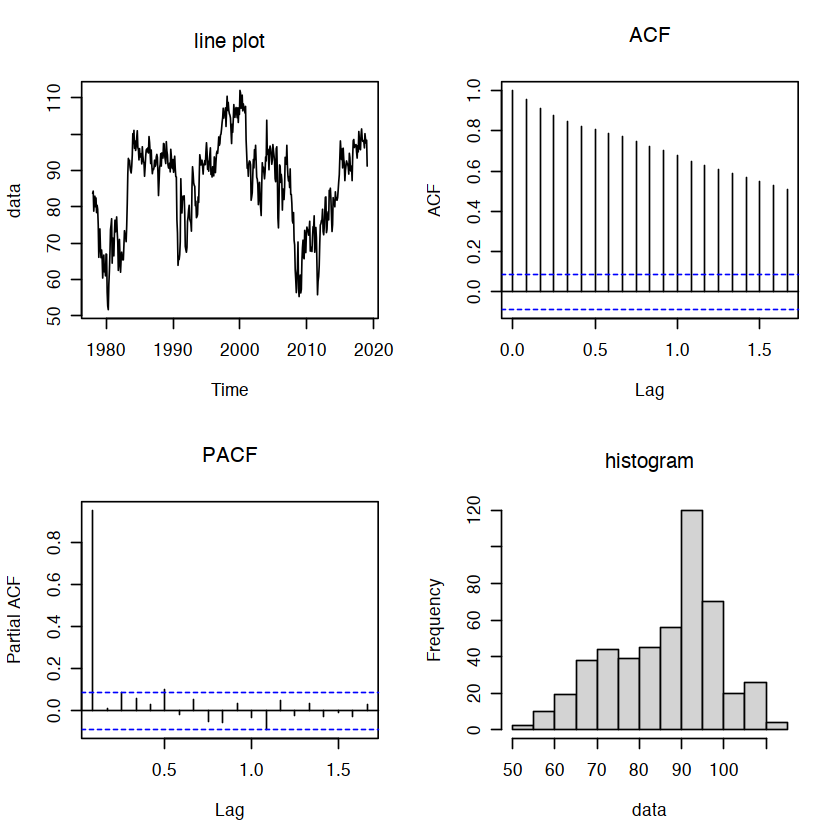

In [123]:
plot_tsf(conf)

# check the plot, ADF and HEGY for the 1st order difference of conf

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -6.00    0.01
[2,]   1 -6.25    0.01
[3,]   2 -5.96    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -6.01    0.01
[2,]   1 -6.25    0.01
[3,]   2 -5.97    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -5.99    0.01
[2,]   1 -6.24    0.01
[3,]   2 -5.96    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 



	HEGY test for unit roots

data:  data

        statistic p-value    
t_1       -7.7624       0 ***
t_2       -6.7764       0 ***
F_3:4     78.7923       0 ***
F_5:6      63.144       0 ***
F_7:8     52.8466       0 ***
F_9:10    48.6392       0 ***
F_11:12   52.4368       0 ***
F_2:12   361.0366       0 ***
F_1:12   335.2064       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: BIC, 0
P-values: based on response surface regressions 

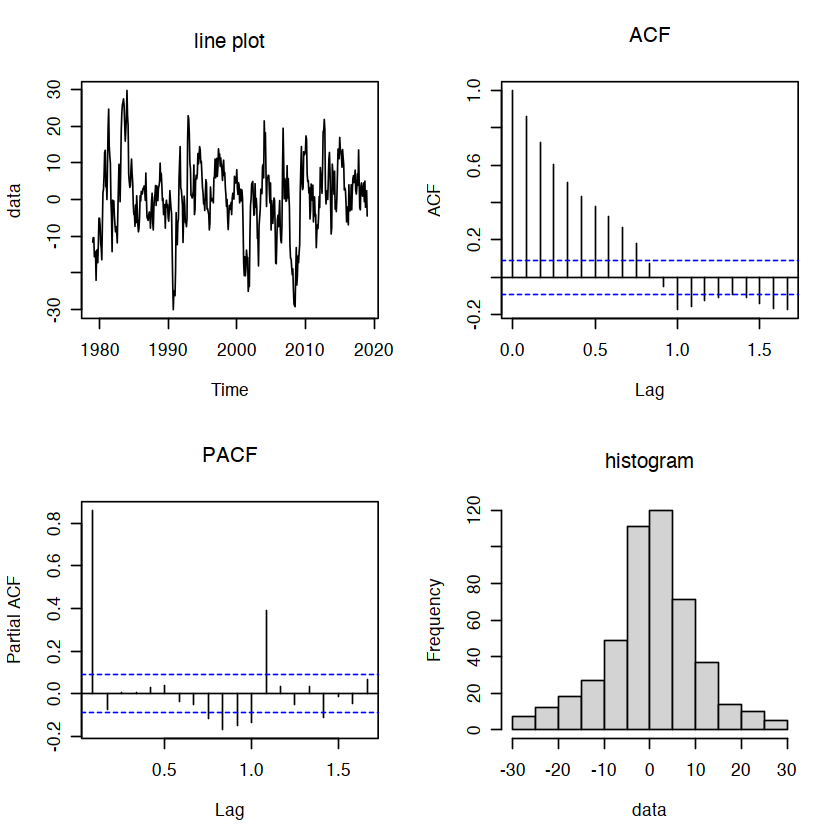

In [124]:
conf_D1 = diff(conf, lag = 12, differences = 1)

plot_tsf(conf_D1)

# check the plot and ADF for the 2nd order difference for AuGDP

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -6.74    0.01
[2,]   1 -7.34    0.01
[3,]   2 -7.02    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -6.73    0.01
[2,]   1 -7.33    0.01
[3,]   2 -7.01    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -6.73    0.01
[2,]   1 -7.33    0.01
[3,]   2 -7.01    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 



	HEGY test for unit roots

data:  data

        statistic p-value    
t_1      -12.5748       0 ***
t_2        -7.545       0 ***
F_3:4    137.9558       0 ***
F_5:6      83.967       0 ***
F_7:8     67.4537       0 ***
F_9:10    56.9006       0 ***
F_11:12   56.6871       0 ***
F_2:12   464.3893       0 ***
F_1:12   431.8867       0 ***
---
Signif. codes: 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

Deterministic terms: constant + trend + seasonal dummies 
Lag selection criterion and order: BIC, 0
P-values: based on response surface regressions 

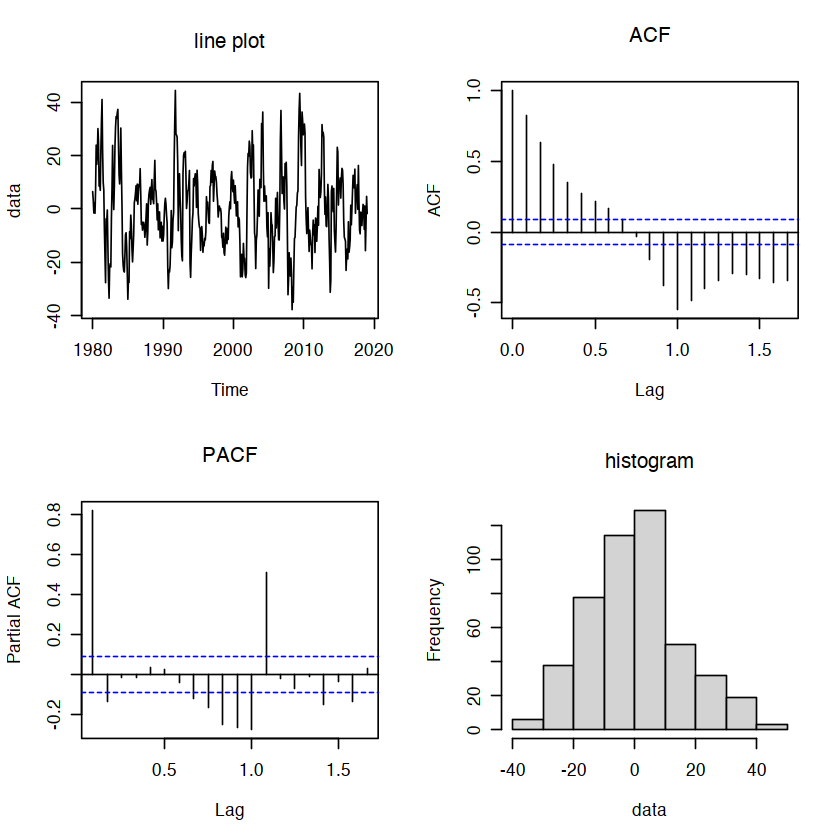

In [125]:
conf_D2 = diff(conf_D1, lag = 12, differences = 1)

plot_tsf(conf_D2)

---

# optimal SARIMA model searching

## firstly, we use $p=P=q=Q=0$

# based on the graph, let's set $p=q=7$ and $d=2$

In [126]:
fit <- Arima(conf, order=c(0,0,0), seasonal=c(0,1,0), include.constant=TRUE)
summary(fit)

Series: conf 
ARIMA(0,0,0)(0,1,0)[12] with drift 

Coefficients:
       drift
      0.0386
s.e.  0.0380

sigma^2 estimated as 100.4:  log likelihood=-1790.49
AIC=3584.99   AICc=3585.01   BIC=3593.34

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.001926746 9.886599 7.302296 -0.8183742 9.093481 0.9730191
                  ACF1
Training set 0.8605157

In [127]:
fit$bic

[1] 3593.338

In [128]:
fit$aicc

[1] 3585.011

# check the residual


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,1,0)[12] with drift
Q* = 1322.9, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



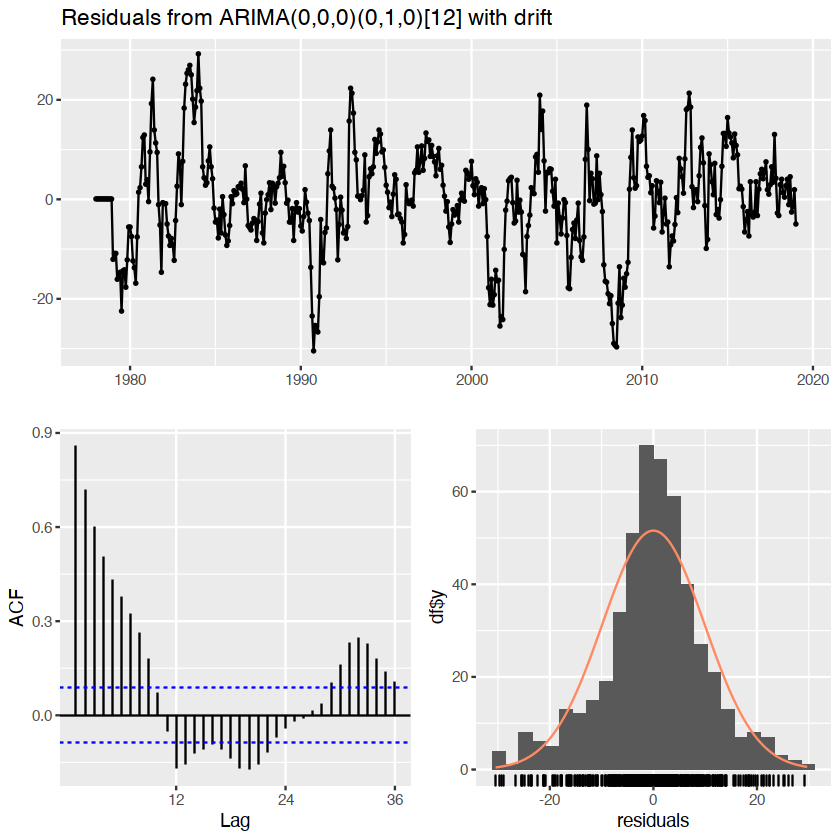

In [129]:
checkresiduals(fit)

# now let's use the function "auto.arima" to choose the value of p,q and d automatically based on BIC and AICc

In [130]:
fit_opt <- auto.arima(conf, trace = TRUE, max.p = 12, max.q = 12, max.P = 12, max.Q = 12, max.order = 5, max.d = 3, max.D = 5, start.p = 12, start.q = 12, start.P = 12, start.Q = 12)


 Fitting models using approximations to speed things up...

 ARIMA(11,1,11)(12,0,12)[12] with drift         : Inf
 ARIMA(0,1,0)            with drift         : 2732.944
 ARIMA(1,1,0)(1,0,0)[12] with drift         : 2731.744
 ARIMA(0,1,1)(0,0,1)[12] with drift         : 2733.142
 ARIMA(0,1,0)                               : 2730.935
 ARIMA(0,1,0)(1,0,0)[12] with drift         : 2729.238
 ARIMA(0,1,0)(2,0,0)[12] with drift         : 2730.315
 ARIMA(0,1,0)(1,0,1)[12] with drift         : 2723.155
 ARIMA(0,1,0)(0,0,1)[12] with drift         : 2731.778
 ARIMA(0,1,0)(2,0,1)[12] with drift         : 2728.664
 ARIMA(0,1,0)(1,0,2)[12] with drift         : 2725.182
 ARIMA(0,1,0)(0,0,2)[12] with drift         : 2730.78
 ARIMA(0,1,0)(2,0,2)[12] with drift         : 2728.478
 ARIMA(1,1,0)(1,0,1)[12] with drift         : 2726.366
 ARIMA(0,1,1)(1,0,1)[12] with drift         : 2724.78
 ARIMA(1,1,1)(1,0,1)[12] with drift         : 2718.18
 ARIMA(1,1,1)(0,0,1)[12] with drift         : 2726.155
 ARIMA(1

In [131]:
summary(fit_opt)

Series: conf 
ARIMA(2,1,1)(1,0,1)[12] 

Coefficients:
         ar1      ar2      ma1    sar1     sma1
      0.6881  -0.0793  -0.7460  0.6390  -0.5617
s.e.  0.1517   0.0538   0.1468  0.3632   0.3908

sigma^2 estimated as 14.67:  log likelihood=-1356.52
AIC=2725.04   AICc=2725.21   BIC=2750.23

Training set error measures:
                     ME     RMSE      MAE        MPE    MAPE      MASE
Training set 0.02650834 3.807396 2.923252 -0.1155194 3.57665 0.3895185
                     ACF1
Training set -0.000741753

# much better BIC and AICc

In [132]:
fit_opt$bic

[1] 2750.231

In [133]:
fit_opt$aicc

[1] 2725.214

# check the test and confidence interval for coefficients

In [134]:
coeftest(fit_opt)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1   0.688131   0.151747  4.5347 5.768e-06 ***
ar2  -0.079338   0.053762 -1.4757   0.14002    
ma1  -0.746031   0.146778 -5.0827 3.721e-07 ***
sar1  0.639027   0.363181  1.7595   0.07849 .  
sma1 -0.561695   0.390815 -1.4372   0.15065    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [135]:
confint(fit_opt)

,2.5 %,97.5 %
ar1,0.39071290,0.98554849
ar2,-0.18471003,0.02603322
ma1,-1.03371099,-0.45835036
sar1,-0.07279465,1.35084822
sma1,-1.32767772,0.20428810


# Ljung and Box are both happy


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)(1,0,1)[12]
Q* = 17.61, df = 19, p-value = 0.5486

Model df: 5.   Total lags used: 24



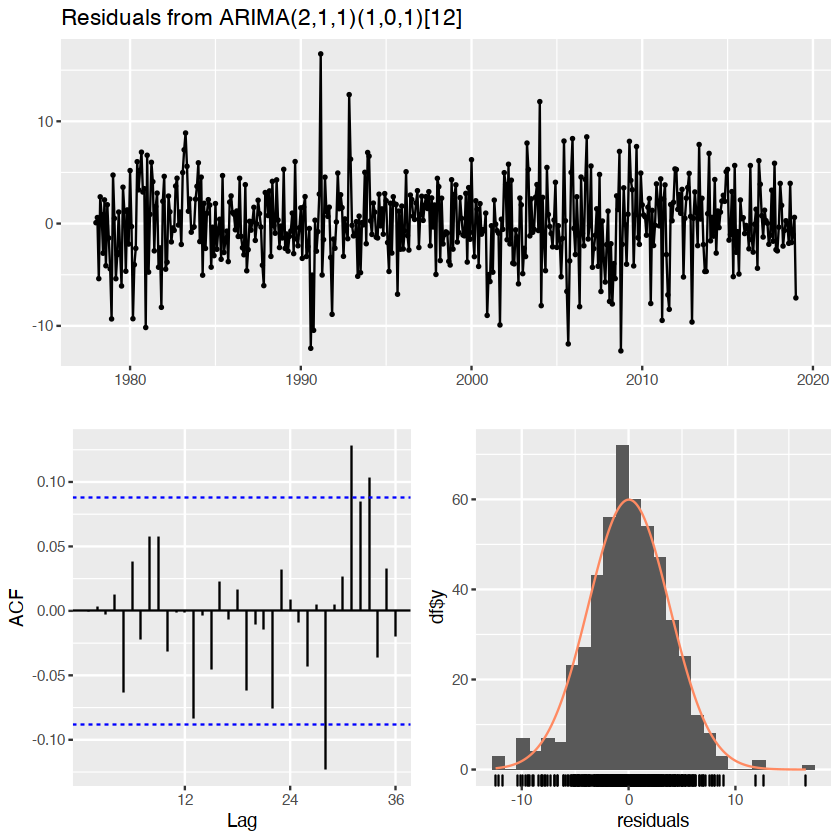

In [136]:
checkresiduals(fit_opt)

# the roots are also farther away from the unit cirlce

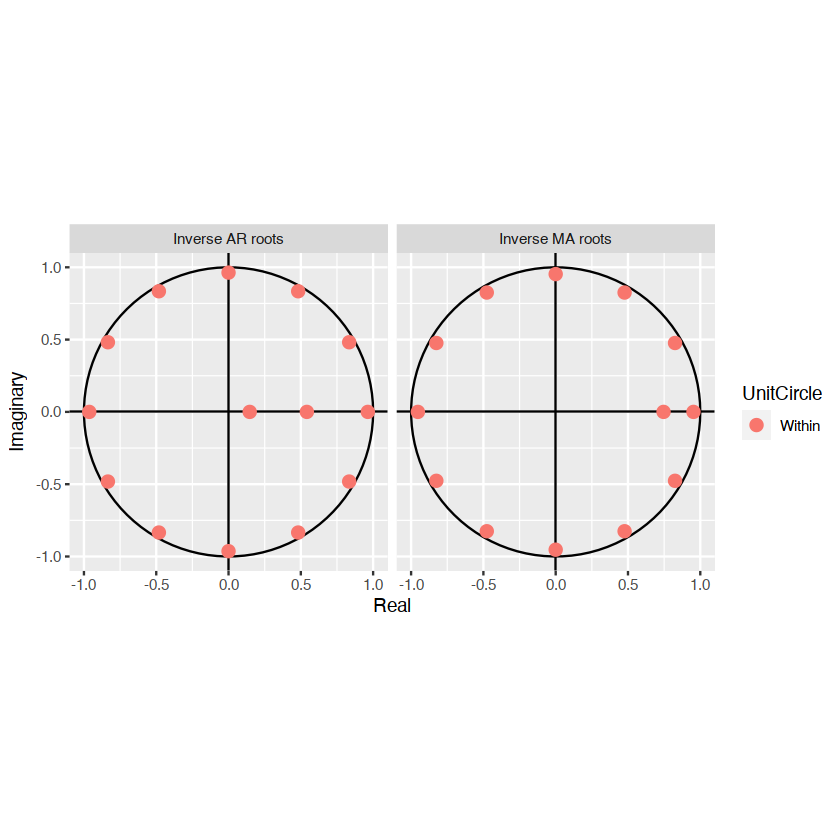

In [137]:
autoplot(fit_opt)

In [138]:
for40 = predict(fit_opt, n.ahead = 40)

for40$pred_ub = for40$pred + 1.96 * for40$se
for40$pred_lb = for40$pred - 1.96 * for40$se

for40

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,,91.83395,92.79626,93.18261,93.54595,93.67708,93.53285,93.56555,93.80630,93.89621,93.93042,94.06856
2020,93.55222,93.70825,93.83278,93.76197,93.81444,93.79978,93.65412,93.64601,93.78415,93.83309,93.85034,93.93612
2021,93.60481,93.70379,93.78297,93.73750,93.77092,93.76148,93.66837,93.66317,93.75143,93.78271,93.79373,93.84854
2022,93.63682,93.70007,93.75067,93.72162,93.74297,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,,3.830778,5.263038,6.134926,6.767066,7.281378,7.730312,8.138796,8.519687,8.880112,9.224314,9.555001
2020,9.874032,10.259180,10.625725,10.971105,11.300372,11.617269,11.924130,12.222434,12.513176,12.797074,13.074682,13.346450
2021,13.612758,13.911734,14.202199,14.482402,14.754474,15.020063,15.280199,15.535534,15.786501,16.033414,16.276513,16.515999
2022,16.752042,17.005172,17.253397,17.495702,17.733165,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


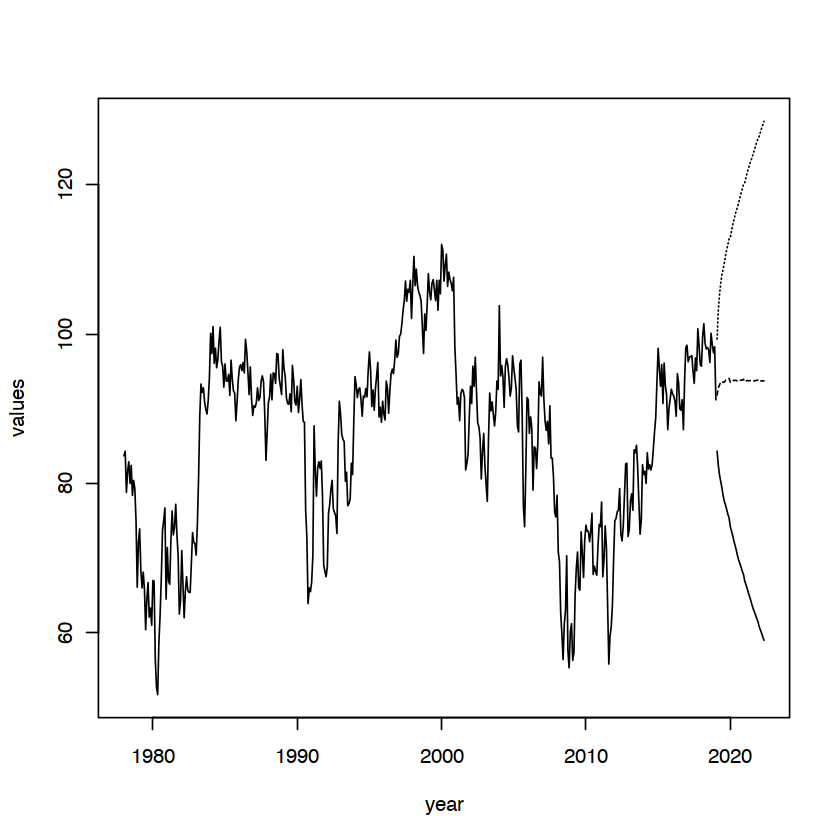

In [139]:
ts.plot(conf, for40$pred, for40$pred_ub, for40$pred_lb, gpars=list(xlab="year", ylab="values", lty=c(1:3)))

# OLS

In [162]:
data <- read_csv("cons_conf.csv")

Rows: 501 Columns: 2

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): conf


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# linear regression

In [256]:
data$t = seq(1,length(data$conf))

data$t2  = data$t^2   
data$t3  = data$t^3   
data$t4  = data$t^4   
data$t5  = data$t^5   
data$t6  = data$t^6   
data$t7  = data$t^7   
data$t8  = data$t^8   
data$t9  = data$t^9  
data$t10 = data$t^10 

data$sin10year = sin(2*pi*data$t/120)
data$cos10year = cos(2*pi*data$t/120)
data$sin1year  = sin(2*pi*data$t/12)
data$cos1year  = cos(2*pi*data$t/12)

In [257]:
t = seq(1,length(data$conf)+40)

df = data.frame(t)

df$t2  = df$t^2   
df$t3  = df$t^3   
df$t4  = df$t^4   
df$t5  = df$t^5   
df$t6  = df$t^6   
df$t7  = df$t^7   
df$t8  = df$t^8   
df$t9  = df$t^9  
df$t10 = df$t^10 

df$sin10year = sin(2*pi*df$t/120)
df$cos10year = cos(2*pi*df$t/120)
df$sin1year  = sin(2*pi*df$t/12)
df$cos1year  = cos(2*pi*df$t/12)


Call:
lm(formula = conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + 
    t10, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7261  -3.5317   0.5869   4.5089  19.7628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.357e+01  3.492e+00  26.799  < 2e-16 ***
t           -2.752e+00  4.750e-01  -5.794 1.23e-08 ***
t2           7.435e-02  2.121e-02   3.506 0.000498 ***
t3          -5.068e-04  4.416e-04  -1.148 0.251707    
t4          -2.954e-06  5.073e-06  -0.582 0.560581    
t5           6.088e-08  3.502e-08   1.739 0.082710 .  
t6          -3.728e-10  1.513e-10  -2.464 0.014077 *  
t7           1.190e-12  4.119e-13   2.888 0.004044 ** 
t8          -2.135e-15  6.860e-16  -3.112 0.001966 ** 
t9           2.048e-18  6.382e-19   3.208 0.001423 ** 
t10         -8.194e-22  2.540e-22  -3.226 0.001337 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.684 on 490 degrees of freedom
Mu

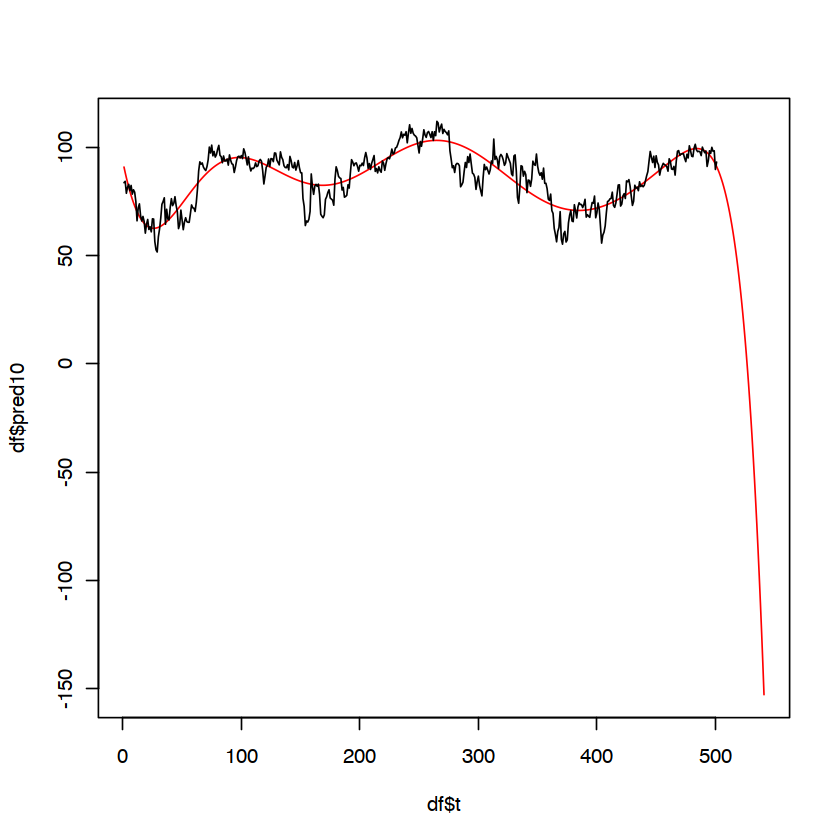

In [241]:
OLS10 = lm(conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10, data=data)
summary(OLS10)

df$pred10 = predict(OLS10, df)

y_max = max( max(df$pred10), max(data$conf))
y_min = min( min(df$pred10), min(data$conf))

plot(df$t, df$pred10, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [217]:
BIC(OLS10)

[1] 3388.729


Call:
lm(formula = conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.300  -3.545   1.012   4.644  19.233 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.850e+01  3.170e+00  31.074  < 2e-16 ***
t           -3.777e+00  3.568e-01 -10.587  < 2e-16 ***
t2           1.285e-01  1.310e-02   9.811  < 2e-16 ***
t3          -1.743e-03  2.218e-04  -7.856 2.52e-14 ***
t4           1.206e-05  2.040e-06   5.910 6.41e-09 ***
t5          -4.648e-08  1.101e-08  -4.222 2.89e-05 ***
t6           1.017e-10  3.583e-11   2.839  0.00472 ** 
t7          -1.207e-13  6.911e-14  -1.747  0.08125 .  
t8           6.616e-17  7.273e-17   0.910  0.36346    
t9          -9.100e-21  3.215e-20  -0.283  0.77723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.747 on 491 degrees of freedom
Multiple R-squared:  0.7205,	Adjusted R-squared:  0.7153 
F-statistic: 14

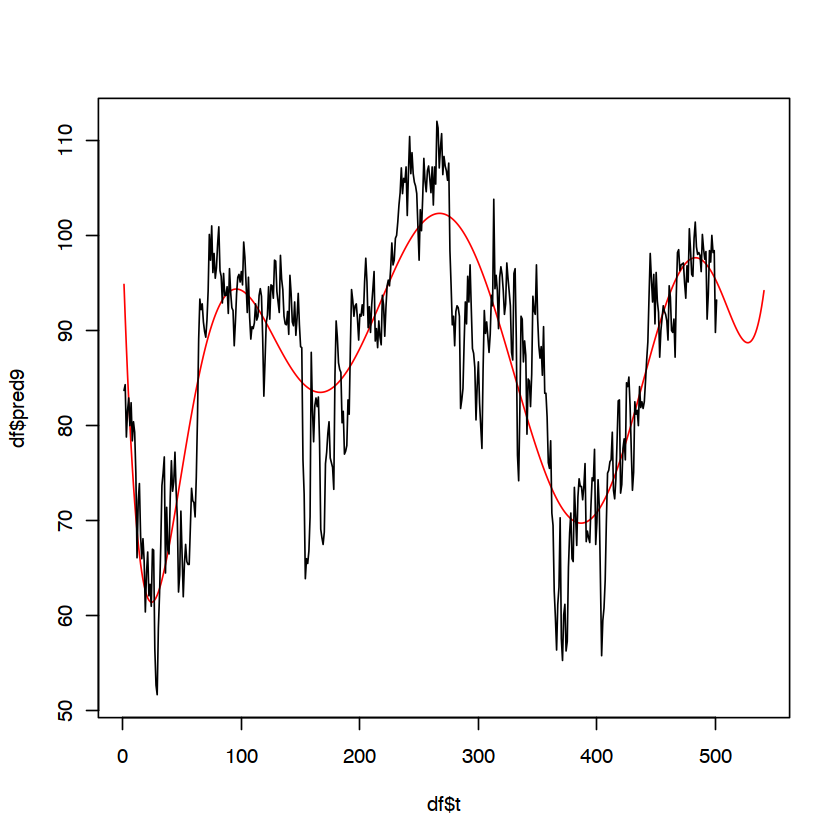

In [243]:
OLS9 = lm(conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9, data=data)
summary(OLS9)

df$pred9 = predict(OLS9, df)

y_max = max( max(df$pred9), max(data$conf))
y_min = min( min(df$pred9), min(data$conf))

plot(df$t, df$pred9, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [219]:
BIC(OLS9)

[1] 3393.044


Call:
lm(formula = conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.3602  -3.4864   0.9843   4.6611  19.2965 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.809e+01  2.822e+00   34.75   <2e-16 ***
t           -3.707e+00  2.573e-01  -14.41   <2e-16 ***
t2           1.255e-01  7.591e-03   16.53   <2e-16 ***
t3          -1.687e-03  1.018e-04  -16.56   <2e-16 ***
t4           1.152e-05  7.253e-07   15.88   <2e-16 ***
t5          -4.347e-08  2.924e-09  -14.87   <2e-16 ***
t6           9.174e-11  6.693e-12   13.71   <2e-16 ***
t7          -1.013e-13  8.104e-15  -12.50   <2e-16 ***
t8           4.560e-17  4.028e-18   11.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.741 on 492 degrees of freedom
Multiple R-squared:  0.7204,	Adjusted R-squared:  0.7159 
F-statistic: 158.5 on 8 and 492 DF,  p-value: < 2.2e-16


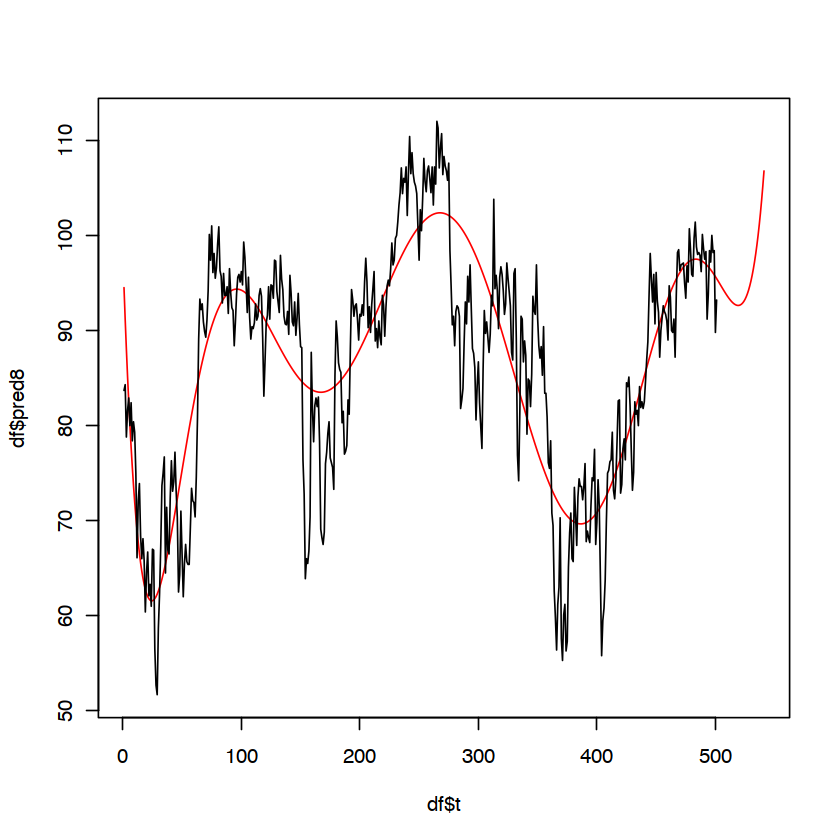

In [244]:
OLS8 = lm(conf ~ t + t2 + t3 + t4 + t5 + t6 + t7 + t8, data=data)
summary(OLS8)

df$pred8 = predict(OLS8, df)

y_max = max( max(df$pred8), max(data$conf))
y_min = min( min(df$pred8), min(data$conf))

plot(df$t, df$pred8, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [221]:
BIC(OLS8)

[1] 3386.91


Call:
lm(formula = conf ~ t + t2 + t3 + t4 + t5 + t6 + t7, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.244  -4.657   1.085   5.333  15.447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.299e+01  2.790e+00   29.75  < 2e-16 ***
t           -1.614e+00  2.007e-01   -8.04 6.71e-15 ***
t2           5.330e-02  4.621e-03   11.54  < 2e-16 ***
t3          -6.380e-04  4.741e-05  -13.46  < 2e-16 ***
t4           3.702e-06  2.495e-07   14.84  < 2e-16 ***
t5          -1.113e-08  7.008e-10  -15.89  < 2e-16 ***
t6           1.664e-11  9.986e-13   16.66  < 2e-16 ***
t7          -9.751e-15  5.669e-16  -17.20  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.561 on 493 degrees of freedom
Multiple R-squared:  0.6476,	Adjusted R-squared:  0.6426 
F-statistic: 129.4 on 7 and 493 DF,  p-value: < 2.2e-16


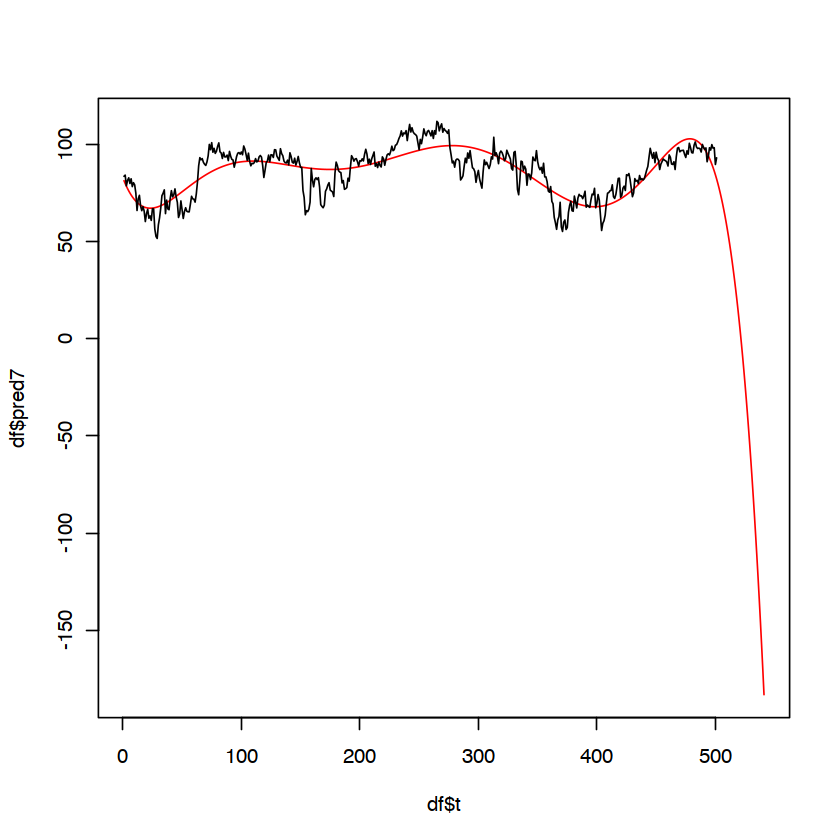

In [245]:
OLS7 = lm(conf ~ t + t2 + t3 + t4 + t5 + t6 + t7, data=data)
summary(OLS7)

df$pred7 = predict(OLS7, df)

y_max = max( max(df$pred7), max(data$conf))
y_min = min( min(df$pred7), min(data$conf))

plot(df$t, df$pred7, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [223]:
BIC(OLS7)

[1] 3496.672


Call:
lm(formula = conf ~ t + t2 + t3 + t4 + t5 + t6, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2795  -6.4079   0.5902   7.1563  23.5563 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.919e+01  3.061e+00  19.336  < 2e-16 ***
t            9.713e-01  1.681e-01   5.778 1.34e-08 ***
t2          -1.564e-02  2.907e-03  -5.378 1.16e-07 ***
t3           1.221e-04  2.171e-05   5.624 3.13e-08 ***
t4          -4.544e-07  7.861e-08  -5.781 1.32e-08 ***
t5           7.786e-10  1.359e-10   5.728 1.77e-08 ***
t6          -4.944e-13  8.995e-14  -5.497 6.20e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.555 on 494 degrees of freedom
Multiple R-squared:  0.4361,	Adjusted R-squared:  0.4292 
F-statistic: 63.67 on 6 and 494 DF,  p-value: < 2.2e-16


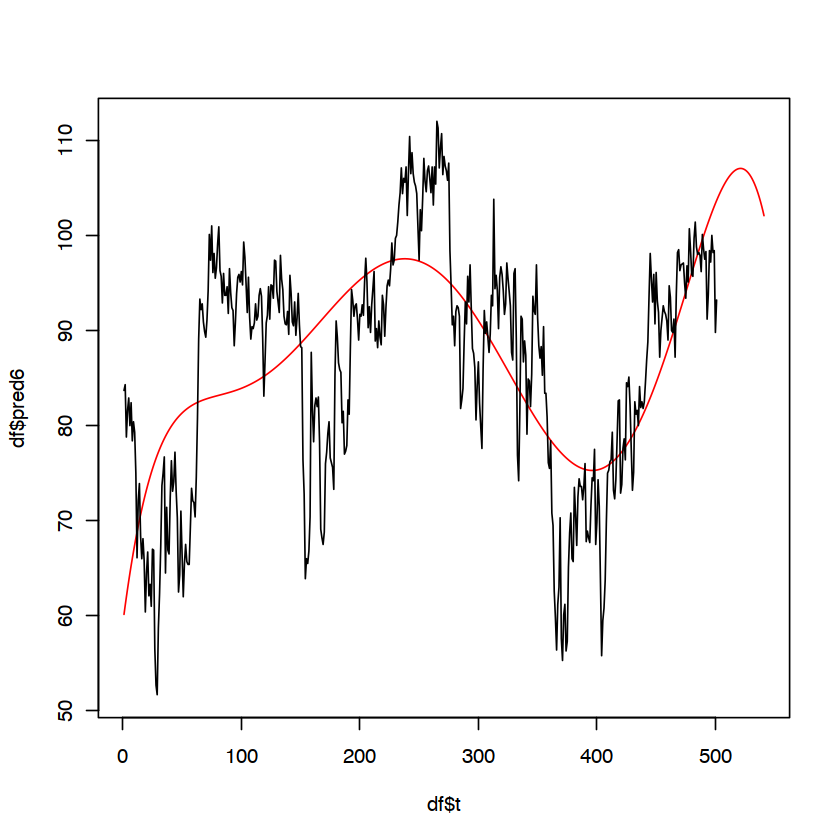

In [246]:
OLS6 = lm(conf ~ t + t2 + t3 + t4 + t5 + t6, data=data)
summary(OLS6)

df$pred6 = predict(OLS6, df)

y_max = max( max(df$pred6), max(data$conf))
y_min = min( min(df$pred6), min(data$conf))

plot(df$t, df$pred6, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [249]:
BIC(OLS6)

[1] 3725.991


Call:
lm(formula = conf ~ sin10year + cos10year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.532  -6.950   0.262   6.838  30.799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.2217     0.5059 170.423  < 2e-16 ***
sin10year    -6.5295     0.7200  -9.068  < 2e-16 ***
cos10year     4.9715     0.7106   6.996 8.52e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.31 on 498 degrees of freedom
Multiple R-squared:  0.2039,	Adjusted R-squared:  0.2007 
F-statistic: 63.77 on 2 and 498 DF,  p-value: < 2.2e-16


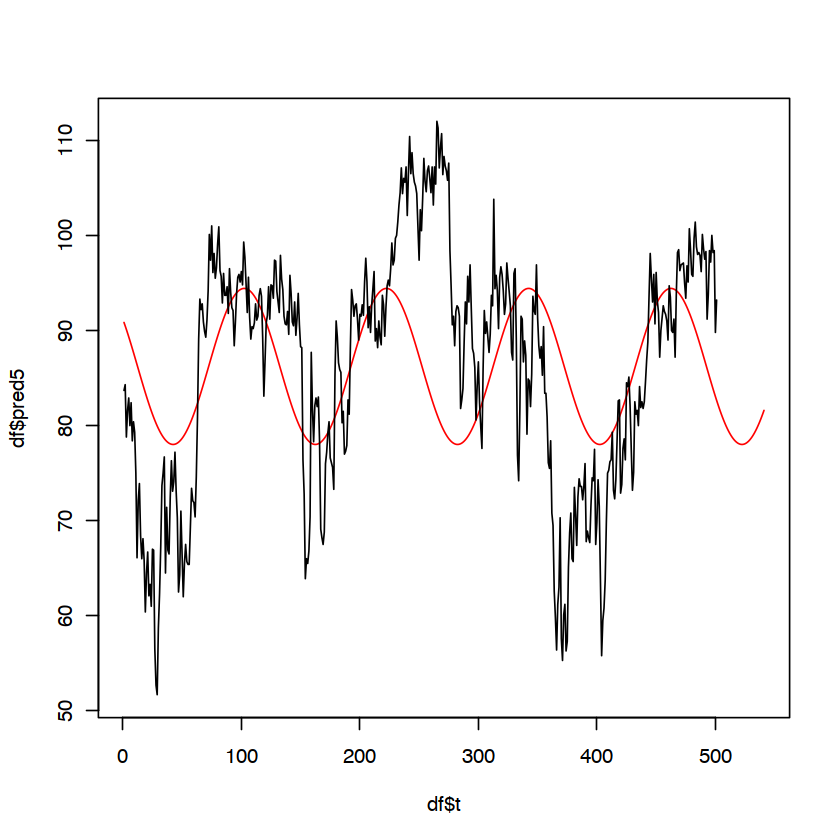

In [247]:
OLS5 = lm(conf ~ sin10year + cos10year, data=data)
summary(OLS5)

df$pred5 = predict(OLS5, df)

y_max = max( max(df$pred5), max(data$conf))
y_min = min( min(df$pred5), min(data$conf))

plot(df$t, df$pred5, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [250]:
BIC(OLS5)

[1] 3873.89


Call:
lm(formula = conf ~ t + sin10year + cos10year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.127  -7.001   0.365   7.085  30.601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 84.822197   1.019912  83.166  < 2e-16 ***
t            0.005576   0.003530   1.580    0.115    
sin10year   -6.379189   0.725232  -8.796  < 2e-16 ***
cos10year    4.873937   0.712222   6.843 2.29e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.29 on 497 degrees of freedom
Multiple R-squared:  0.2079,	Adjusted R-squared:  0.2031 
F-statistic: 43.47 on 3 and 497 DF,  p-value: < 2.2e-16


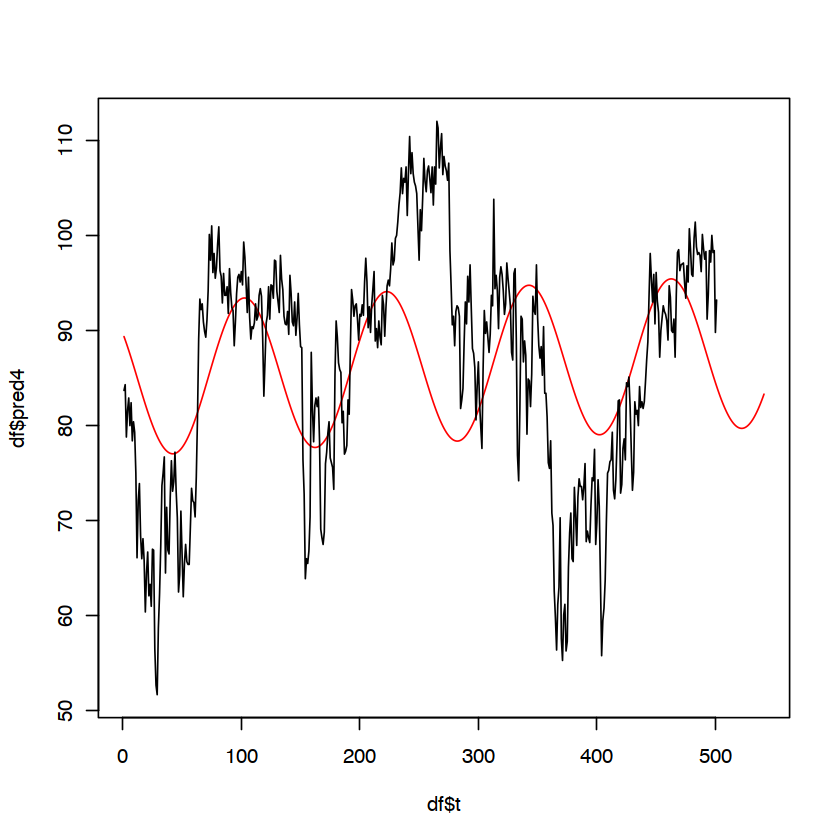

In [248]:
OLS4 = lm(conf ~ t + sin10year + cos10year, data=data)
summary(OLS4)

df$pred4 = predict(OLS4, df)

y_max = max( max(df$pred4), max(data$conf))
y_min = min( min(df$pred4), min(data$conf))

plot(df$t, df$pred4, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [251]:
BIC(OLS4)

[1] 3877.598


Call:
lm(formula = conf ~ t + t2 + sin10year + cos10year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.444  -6.225   0.529   6.692  25.959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.649e+01  1.460e+00  52.386  < 2e-16 ***
t            1.046e-01  1.343e-02   7.787 4.03e-14 ***
t2          -1.972e-04  2.591e-05  -7.612 1.38e-13 ***
sin10year   -5.908e+00  6.897e-01  -8.566  < 2e-16 ***
cos10year    5.599e+00  6.813e-01   8.218 1.82e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.69 on 496 degrees of freedom
Multiple R-squared:  0.2907,	Adjusted R-squared:  0.285 
F-statistic: 50.82 on 4 and 496 DF,  p-value: < 2.2e-16


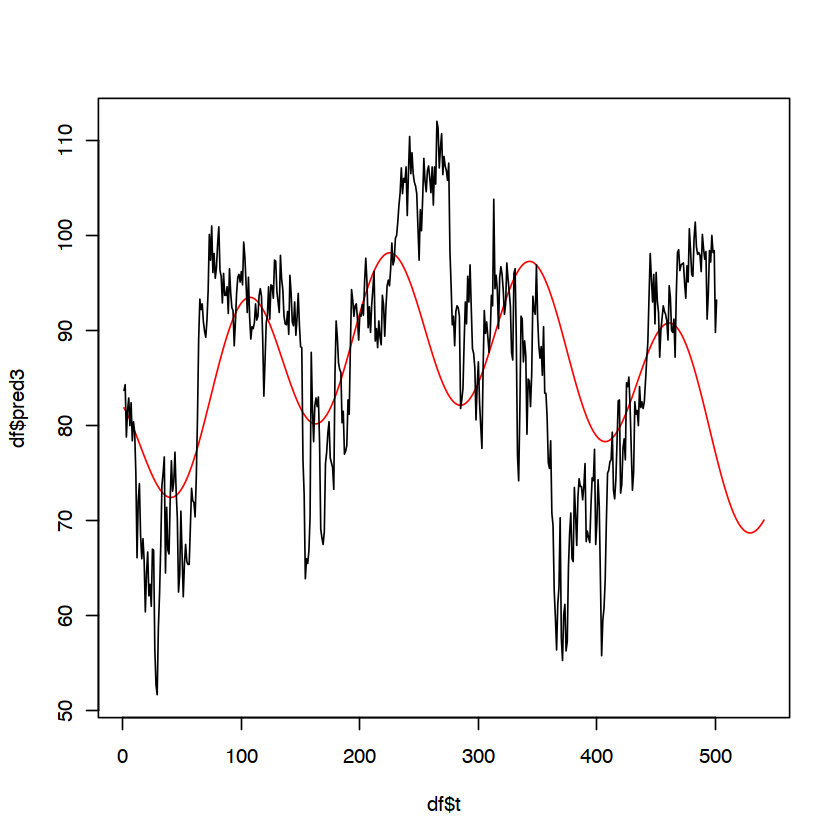

In [252]:
OLS3 = lm(conf ~ t + t2 + sin10year + cos10year, data=data)
summary(OLS3)

df$pred3 = predict(OLS3, df)

y_max = max( max(df$pred3), max(data$conf))
y_min = min( min(df$pred3), min(data$conf))

plot(df$t, df$pred3, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [253]:
BIC(OLS3)

[1] 3828.467


Call:
lm(formula = conf ~ t + t2 + +t3 + sin10year + cos10year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.4638  -5.2937  -0.2896   5.8971  26.4076 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.318e+01  1.754e+00  36.024  < 2e-16 ***
t            4.170e-01  3.006e-02  13.876  < 2e-16 ***
t2          -1.748e-03  1.387e-04 -12.599  < 2e-16 ***
t3           2.059e-06  1.816e-07  11.335  < 2e-16 ***
sin10year   -4.955e+00  6.209e-01  -7.981 1.02e-14 ***
cos10year    4.980e+00  6.101e-01   8.162 2.75e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.538 on 495 degrees of freedom
Multiple R-squared:  0.4369,	Adjusted R-squared:  0.4312 
F-statistic: 76.81 on 5 and 495 DF,  p-value: < 2.2e-16


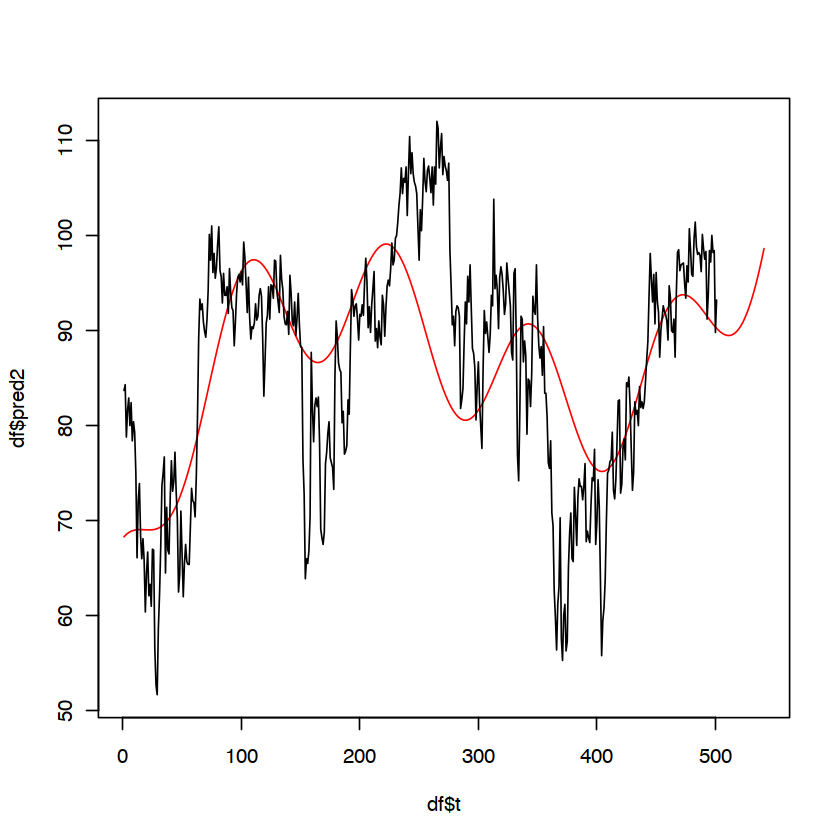

In [254]:
OLS2 = lm(conf ~ t + t2 + + t3 + sin10year + cos10year, data=data)
summary(OLS2)

df$pred2 = predict(OLS2, df)

y_max = max( max(df$pred2), max(data$conf))
y_min = min( min(df$pred2), min(data$conf))

plot(df$t, df$pred2, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [255]:
BIC(OLS2)

[1] 3719.065


Call:
lm(formula = conf ~ t + t2 + +t3 + sin10year + cos10year + sin1year + 
    cos1year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.0765  -5.2458  -0.4005   6.1531  26.2983 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.312e+01  1.752e+00  36.029  < 2e-16 ***
t            4.179e-01  3.002e-02  13.918  < 2e-16 ***
t2          -1.751e-03  1.386e-04 -12.634  < 2e-16 ***
t3           2.062e-06  1.814e-07  11.366  < 2e-16 ***
sin10year   -4.954e+00  6.201e-01  -7.988 9.74e-15 ***
cos10year    4.971e+00  6.093e-01   8.158 2.85e-15 ***
sin1year     9.059e-01  6.014e-01   1.506    0.133    
cos1year    -6.263e-01  6.026e-01  -1.039    0.299    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.525 on 493 degrees of freedom
Multiple R-squared:  0.4407,	Adjusted R-squared:  0.4327 
F-statistic: 55.49 on 7 and 493 DF,  p-value: < 2.2e-16


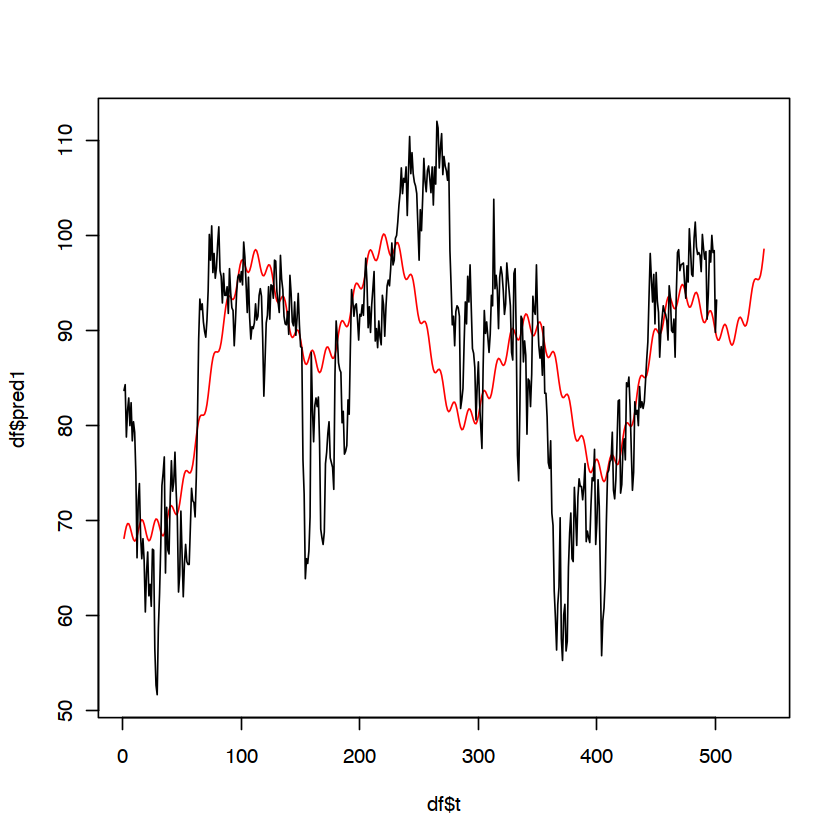

In [258]:
OLS1 = lm(conf ~ t + t2 + + t3 + sin10year + cos10year + sin1year + cos1year, data=data)
summary(OLS1)

df$pred1 = predict(OLS1, df)

y_max = max( max(df$pred1), max(data$conf))
y_min = min( min(df$pred1), min(data$conf))

plot(df$t, df$pred1, type='l', col='red', ylim = c(y_min,y_max))
lines(data$t, data$conf, ylim = c(y_min,y_max))

In [259]:
BIC(OLS1)

[1] 3728.116